# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

<p>In the city of Villahermosa there are many people who want to have a bussiness and the most common option is open a restaurant. In this case i will focus in find the best suburbs to open a pizza restaurant in Villahermosa. I will try to find suburbs with many population and without pizza restaurant.</p>

## Data <a name="data"></a>

<p> According to business problem i will focus in:
    <ul>
        <li>The pizza restaurants nearest to each suburb</li>
        <li>The population and area of suburn according your postal code</li>
        
I will get pizza restaurants and their locations with foursquare Api. Finally i will get the location of suburbs with the geopy API

In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import requests
import folium
from geopy.geocoders import Nominatim
import pyproj

### Location of Villahermosa

In [2]:
ciudad="Villahermosa, Tabasco"
locator=Nominatim(user_agent="ny_explorer")
place=locator.geocode(ciudad)
latitude_villahermosa=place.latitude
longitude_villahermosa=place.longitude

print(" La latitude es: {}, La longitude es {}".format(latitude_villahermosa,longitude_villahermosa))

 La latitude es: 18.0018152, La longitude es -92.93304014837511


In [3]:
Map_centro=folium.Map(location=[latitude_villahermosa,longitude_villahermosa],zoom_start=13)

folium.CircleMarker([latitude_villahermosa, longitude_villahermosa],
        radius=5,        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_centro)
Map_centro

## Get dataset about suburbs of Villahermosa

### Get name of the suburb and postal code

In [4]:
villahermosa=pd.read_html("https://micodigopostal.org/tabasco/centro/")
df_vil=villahermosa[0]
print(len(df_vil))
df_vil.head()

450


,Asentamiento▼,Tipo de Asentamiento,Código Postal,Municipio,Ciudad,Zona,Mapa
0,18 de Marzo,Colonia,86140,Centro,Villahermosa,Urbana,Mapa
1,27 de Octubre,Fraccionamiento,86288,Centro,-,Urbana,Mapa
2,Acachapan y Colmena 1a Secc,Ranchería,86281,Centro,-,Rural,Mapa
3,Acachapan y Colmena 2da. Sección (El Maluco),Ejido,86277,Centro,-,Rural,Mapa
4,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...


In [5]:
df_vil=df_vil.drop(df_vil[df_vil["Ciudad"]!="Villahermosa"].index)
df_vil=df_vil.reset_index(drop=True)
df_vil.drop(columns=["Tipo de Asentamiento","Municipio","Zona","Mapa","Ciudad"],inplace=True)
df_vil=df_vil.rename(columns={"Asentamiento▼":"Asentamiento"})
df_vil.head()

,Asentamiento,Código Postal
0,18 de Marzo,86140
1,Adolfo Lopez Mateos,86040
2,Álvaro Obregón,86050
3,América,86143
4,Ángeles Ixtacomitan,86143


### Drop "de"

In [6]:
def delete_de(row):
    new_name=row["Asentamiento"].replace(" de "," ")
    print(new_name)
    return new_name
df_vil["Asentamiento"]=df_vil.apply(delete_de,axis=1)
    

18 Marzo
Adolfo Lopez Mateos
Álvaro Obregón
América
Ángeles Ixtacomitan
Arboledas
Artesanos Infonavit
Atasta
Aurora
Benito Juárez
Blancas Mariposas
Bonampak
Bonanza
Bosques Villahermosa
Brisa del Usumacinta
Brisas Del Grijalva
Carlos A Madrazo
Carlos A Madrazo
Carrizal
Carrizal
Casa Blanca 1a Sección
Casa Blanca 2a Sección
Cedros
Chichicaste
Club Campestre
Club Lago
Conjunto Habitacional Los Álamos
Conjunto Habitacional Revolución
Cosmos
Cotip
Cumbres
Del Bosque
Deportiva Residencial
Edén Premier
El Edén
El Espejo 1
El Espejo 2
El Parque
El Recreo
España
Estrellas Buenavista
Fideicomiso Ciudad Industrial
Florida
Fovissste 1a Etapa
Fovissste 2a Etapa
Fovissste Casa Blanca
Framboyanes
Francisco Villa
Galaxia
Galaxia/tabasco 2000
Gaviotas Norte
Gaviotas Norte Sector Explanada
Gaviotas Norte Sector Popular
Gaviotas Sur (El Monal)
Gaviotas Sur Sección San Jose
Gaviotas Sur Sector Armenia
Gil y Sáenz (El Águila)
Guadalupe
Guadalupe Borja
Guayabal
Hacienda Buena Vista
Hacienda Esmeralda
Herib

### Get location of suburbs

In [7]:
latitude_a=[]
longitude_a=[]

for asen in zip(df_vil["Asentamiento"]):
    address="{}, Villahermosa,Tabasco".format(asen)
    geolocation=Nominatim(user_agent="ny_agent")
    location=geolocation.geocode(address)
    if(location!=None):
        latitude_a.append(location.latitude)
        longitude_a.append(location.longitude)
        print(asen)
    else:
        latitude_a.append(None)
        longitude_a.append(None)
        print("not found")
        

('18 Marzo',)
not found
('Álvaro Obregón',)
not found
not found
('Arboledas',)
not found
('Atasta',)
('Aurora',)
('Benito Juárez',)
('Blancas Mariposas',)
('Bonampak',)
('Bonanza',)
('Bosques Villahermosa',)
not found
not found
not found
not found
('Carrizal',)
('Carrizal',)
not found
not found
('Cedros',)
not found
('Club Campestre',)
('Club Lago',)
not found
not found
not found
not found
('Cumbres',)
('Del Bosque',)
not found
not found
('El Edén',)
('El Espejo 1',)
('El Espejo 2',)
('El Parque',)
('El Recreo',)
('España',)
not found
not found
('Florida',)
not found
not found
not found
('Framboyanes',)
('Francisco Villa',)
not found
not found
('Gaviotas Norte',)
not found
not found
not found
not found
not found
not found
('Guadalupe',)
('Guadalupe Borja',)
('Guayabal',)
not found
not found
not found
not found
not found
('Insurgentes',)
not found
('Ixtacomitán 1ra. Sección',)
not found
not found
not found
('Jardines Buenavista',)
('Jardines Villahermosa',)
not found
not found
not found

In [8]:
df_vil["Latitude"]=None
df_vil["Longitude"]=None
df_vil.loc[:,"Latitude"]=latitude_a
df_vil.loc[:,"Longitude"]=longitude_a
df_vil.head()

,Asentamiento,Código Postal,Latitude,Longitude
0,18 Marzo,86140,17.972147,-92.980013
1,Adolfo Lopez Mateos,86040,NaN,NaN
2,Álvaro Obregón,86050,18.028827,-92.887635
3,América,86143,NaN,NaN
4,Ángeles Ixtacomitan,86143,NaN,NaN


In [9]:
print("El tamaño original es: {}".format(len(df_vil)))
df_vil_com=df_vil.dropna(axis=0)
df_vil_com.reset_index(drop=True,inplace=True)
df_vil_com["Código Postal"]=df_vil_com["Código Postal"].astype(int)
print("El nuevo tamaño es: {}".format(len(df_vil_com)))
df_vil_com.head()

El tamaño original es: 213
El nuevo tamaño es: 95


C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Asentamiento,Código Postal,Latitude,Longitude
0,18 Marzo,86140,17.972147,-92.980013
1,Álvaro Obregón,86050,18.028827,-92.887635
2,Arboledas,86079,17.986451,-92.931571
3,Atasta,86100,17.986412,-92.942106
4,Aurora,86107,18.001815,-92.933040


### Get Population and Area

In [50]:
df_col=pd.read_html("https://xn--cdigos-postales-vrb.cybo.com/m%C3%A9xico/villahermosa-(tabasco)/#listcodes")
df_col=df_col[1]
df_col.drop("Región administrativa",axis=1, inplace=True)
df_col.head()

,Código Postal,Ciudad,Población,Área
0,86000,Villahermosa (Tabasco),18.083,"1,818 km²"
1,86001,—,—,—
2,86010,Villahermosa (Tabasco),5.671,"2,394 km²"
3,86015,Villahermosa (Tabasco),—,—
4,86016,Villahermosa (Tabasco),3.107,"4,668 km²"


In [51]:
df_col.replace("—",np.nan,inplace=True)
df_col.dropna(inplace=True)
df_col.reset_index(drop=True,inplace=True)
df_col.head()

,Código Postal,Ciudad,Población,Área
0,86000,Villahermosa (Tabasco),18.083,"1,818 km²"
1,86010,Villahermosa (Tabasco),5.671,"2,394 km²"
2,86016,Villahermosa (Tabasco),3.107,"4,668 km²"
3,86017,Villahermosa (Tabasco),15.992,"1,982 km²"
4,86018,Villahermosa (Tabasco),4.517,"0,225 km²"


In [52]:
#Convertir Area a numeros, unir ambas tablas a traves del codigo postal, la pagina o Peticiones a traves de codigo
def eliminar_letras(row):
    nuevo=row["Área"]
    if (nuevo.find('km²') != -1):
        nuevo=nuevo.replace(",",".")
        nuevo=float(nuevo.replace("km²",""))
        return nuevo 
        
    if (nuevo.find('m²') != -1):
        nuevo=nuevo.replace(",",".")
        nuevo=float(nuevo.replace(" m²",""))
        nuevo=nuevo/1000.0
        return nuevo 

def eliminar_puntos(row):
    nuevo=row["Población"].replace(".","")
    return nuevo
    
df_col["Área"]=df_col.apply(eliminar_letras,axis=1)
df_col["Población"]=df_col.apply(eliminar_puntos,axis=1)
#df_col["Área"]=df_col["Área"].astype(float)
df_col["Población"]=df_col["Población"].astype(float)
#df_n_cod["Área"]=df_n_cod["Área"].astype(float)
df_col.head()

,Código Postal,Ciudad,Población,Área
0,86000,Villahermosa (Tabasco),18083.0,1.818
1,86010,Villahermosa (Tabasco),5671.0,2.394
2,86016,Villahermosa (Tabasco),3107.0,4.668
3,86017,Villahermosa (Tabasco),15992.0,1.982
4,86018,Villahermosa (Tabasco),4517.0,0.225


In [53]:
df_col.loc[df_col.loc[:,"Área"]>10]

,Código Postal,Ciudad,Población,Área
37,86127,Villahermosa (Tabasco),38224.0,18.9
43,86144,Villahermosa (Tabasco),6332.0,14.9
51,86170,Villahermosa (Tabasco),10547.0,11.2


In [54]:
df_col["Densidad"]=round(df_col["Población"]/df_col["Área"],2)
df_col.drop(columns="Ciudad",inplace=True)
df_col.rename(columns={"Área":"area (km2)","Población":"poblacion","Código Postal":"codigo postal","Densidad": "densidad"},inplace=True)
df_col.head()

,codigo postal,poblacion,area (km2),densidad
0,86000,18083.0,1.818,9946.64
1,86010,5671.0,2.394,2368.84
2,86016,3107.0,4.668,665.60
3,86017,15992.0,1.982,8068.62
4,86018,4517.0,0.225,20075.56


### Join Dataframes of villahermosa 

In [55]:
df_vil_com["poblacion"]=np.nan
df_vil_com["area (km2)"]=np.nan
df_vil_com["densidad"]=np.nan

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [56]:
df_vil_com.head()

,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
0,18 Marzo,86140,17.972147,-92.980013,NaN,NaN,NaN,12175308.04,10004637.71,0
1,Álvaro Obregón,86050,18.028827,-92.887635,NaN,NaN,NaN,12155454.80,10035358.82,0
2,Arboledas,86079,17.986451,-92.931571,NaN,NaN,NaN,12170281.50,10020791.53,1
3,Atasta,86100,17.986412,-92.942106,NaN,NaN,NaN,12170306.92,10017277.50,1
4,Benito Juárez,86126,17.991007,-92.917499,NaN,NaN,NaN,12168674.60,10025478.63,2


In [57]:
for i in range(0,len(df_col)):
    for n in range(0,len(df_vil_com)):
        if(df_vil_com.loc[n,"Código Postal"]==df_col.loc[i,"codigo postal"]):
            df_vil_com.loc[n,"poblacion"]=df_col.loc[i,"poblacion"]
            df_vil_com.loc[n,"area (km2)"]=df_col.loc[i,"area (km2)"]
            df_vil_com.loc[n,"densidad"]=df_col.loc[i,"densidad"]
        
            

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
df_col["codigo postal"].dtype

dtype('int64')

In [59]:
df_vil_com["Código Postal"].dtype

dtype('int32')

In [60]:
df_vil_com.dropna(inplace=True)
df_vil_com.reset_index(drop=True,inplace=True)
df_vil_com.head()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
0,18 Marzo,86140,17.972147,-92.980013,2884.0,0.302000,9549.67,12175308.04,10004637.71,0
1,Álvaro Obregón,86050,18.028827,-92.887635,7423.0,0.748000,9923.80,12155454.80,10035358.82,0
2,Arboledas,86079,17.986451,-92.931571,1689.0,0.061959,27259.96,12170281.50,10020791.53,1
3,Atasta,86100,17.986412,-92.942106,28754.0,3.828000,7511.49,12170306.92,10017277.50,1
4,Benito Juárez,86126,17.991007,-92.917499,12166.0,1.626000,7482.16,12168674.60,10025478.63,2


## Get pizzerias in Villahermosa from Foursquare

In [61]:
#Search: Lugares que quieres buscar
#radius: metros a la redonda de la localizacion central que das
#limit: Limite de lugares devueltos
def get_venues_foursquare(latitude, longitude,search_query="favoritos",radius=1000,LIMIT=100):
    CLIENT_ID = 'TRPF3ECV25OMNR00HGAOTJULBKFSI2GK4VEWN5FUIJ2O5DKY' # your Foursquare ID
    CLIENT_SECRET = 'DSOTWAQEKE2SJJE0BUEI4UB42JIAY4HNIBVMG3MRL5KS5EWK' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    url='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, latitude_villahermosa, longitude_villahermosa, VERSION, search_query, radius, LIMIT)
    return url

In [62]:
url=get_venues_foursquare(latitude_villahermosa,longitude_villahermosa,"pizza",5000,100)
url

'https://api.foursquare.com/v2/venues/search?client_id=TRPF3ECV25OMNR00HGAOTJULBKFSI2GK4VEWN5FUIJ2O5DKY&client_secret=DSOTWAQEKE2SJJE0BUEI4UB42JIAY4HNIBVMG3MRL5KS5EWK&ll=18.0018152,-92.93304014837511&v=20180605&query=pizza&radius=5000&limit=100'

In [63]:
query=requests.get(url).json()
venues=query['response']['venues']
venues=json_normalize(venues)
len(venues)
venues

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,52e193aa11d2a58a53853075,Av. 27 De Febrero 4002,MX,Villahermosa,México,Esq. Paseo Tabasco,1454,"[Av. 27 De Febrero 4002 (Esq. Paseo Tabasco), ...","[{'label': 'display', 'lat': 18.00277904280433...",18.002779,-92.946739,NaN,86035,Tabasco,Boston's The Gourmet Pizza,v-1587422687,NaN
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4b92e05ff964a520a02334e3,Paseo Tabasco,MX,Villahermosa,México,"Av. Ruiz Cortines, col. Tabasco 2000",984,"[Paseo Tabasco (Av. Ruiz Cortines, col. Tabasc...","[{'label': 'display', 'lat': 17.99767171397832...",17.997672,-92.941252,NaN,NaN,Tabasco,Pizza Hut,v-1587422687,NaN
2,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4cad24ab97c8a1cdea38a7a5,Av. Via 3 Loc. 1,MX,Villahermosa,México,NaN,1216,"[Av. Via 3 Loc. 1, 86035 Villahermosa, Tabasco...","[{'label': 'display', 'lat': 18.00181834840124...",18.001818,-92.944530,Col. Tabasco 2000,86035,Tabasco,Domino's Pizza,v-1587422687,NaN
3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4ccf7b7e6200b1f73ac9ce28,Plaza Las Galas,MX,Villahermosa,México,Av. Francisco J. Mina esq. Lamberto Castellanos,1275,[Plaza Las Galas (Av. Francisco J. Mina esq. L...,"[{'label': 'display', 'lat': 17.99764339314918...",17.997643,-92.921815,Centro,86000,Tabasco,Domino's Pizza,v-1587422687,NaN
4,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4f77d123e4b042108329fad3,Col. Guayabal,MX,Villahermosa,México,NaN,1606,"[Col. Guayabal, Villahermosa, Tabasco, México]","[{'label': 'display', 'lat': 17.98738876756720...",17.987389,-92.933483,NaN,NaN,Tabasco,Pizza Hut,v-1587422687,NaN
5,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4de854318130632db9074fea,Heroico Colegio Militar 109,MX,Villahermosa,México,H. Colegio Militar,2316,[Heroico Colegio Militar 109 (H. Colegio Milit...,"[{'label': 'display', 'lat': 17.98248662175546...",17.982487,-92.941144,NaN,86100,Tabasco,Pizza Hut,v-1587422687,NaN
6,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4df5188622718759f825659a,Prol. Av. Universidad,MX,Villahermosa,México,NaN,2936,"[Prol. Av. Universidad, Villahermosa, Tabasco,...","[{'label': 'display', 'lat': 18.01723171867118...",18.017232,-92.910527,NaN,NaN,Tabasco,Pizza Hut,v-1587422687,NaN
7,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4dc36804fa76d685cdadb6dc,Plaza Las Americas,MX,Villahermosa,México,Av. Ramón Mendoza Ext. No. 102 Int. Local E-1,2061,[Plaza Las Americas (Av. Ramón Mendoza Ext. No...,"[{'label': 'display', 'lat': 18.01451259681407...",18.014513,-92.918868,NaN,NaN,Tabasco,Domino's Pizza,v-1587422687,NaN
8,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4ce5d85d9f776ea8f1934e22,Av. Gregorio Mendez 1503,MX,Villahermosa,México,Av. Gregorio Mendez esq. Jesús Taracena,839,[Av. Gregorio Mendez 1503 (Av. Gregorio Mende...,"[{'label': 'display', 'lat': 17.99494026565391...",17.994940,-92.929778,NaN,86070,Tabasco,Pizza Hut,v-1587422687,NaN
9,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4dd9c373d22d38ef43216f50,Cto. Int. Carlos Pellicer Cámara s/n,MX,Villahermosa,México,Esq. Paseo Usumacinta,3415,[Cto. Int. Carlos Pellicer Cámara s/n (Esq. Pa...,"[{'label': 'display', 'lat': 17.97257215424679...",17.972572,-92.923278,NaN,NaN,Tabasco,Domino's Pizza,v-1587422687,NaN


In [64]:
def get_category(row):
    category=row["categories"]
    if(len(category)==0):
        return None
    else:
        return category[0]['name']
    
columns_filtradas=["name","location.lat","location.lng","categories"]
df=venues[columns_filtradas]


df["categories"]=df.apply(get_category,axis=1)
df.head()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,name,location.lat,location.lng,categories
0,Boston's The Gourmet Pizza,18.002779,-92.946739,American Restaurant
1,Pizza Hut,17.997672,-92.941252,Pizza Place
2,Domino's Pizza,18.001818,-92.944530,Pizza Place
3,Domino's Pizza,17.997643,-92.921815,Pizza Place
4,Pizza Hut,17.987389,-92.933483,Pizza Place


In [65]:
map_pizzerias=folium.Map(location=[latitude_villahermosa,longitude_villahermosa],zoom_start=13)

for name,latitude,longitude in zip(df["name"],df["location.lat"],df["location.lng"]):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker([latitude, longitude],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pizzerias)
map_pizzerias

## Methodology <a name="methodology"></a>

<p>Now i have two dataframes:
    <ul>
        <li>Dataframe of suburbs and dataframe of pizza restaurants </li>
        In order to have a more accurate in locations of suburbs and pizza restaurant i will convert the polar coordinates to cartesion coordinates. Then i will get the amount of pizza restaurant close to each suburb.
        Finally i will get the most important features in the two dataframe and i will use Kmeans technic to get the best suburb to open a pizza restaurant.
    </p>

### Get x and y position

### Convert  polar to cartesian functions

In [66]:
def polar_to_cartesian(lon,lat):
    proj_pol=pyproj.Proj(proj="latlong",preserve_units=False)
    proj_car=pyproj.Proj(proj="utm",preserve_units=False)
    xy=pyproj.transform(proj_pol,proj_car,lon,lat)
    return xy[0],xy[1]

def distance_between_venues(x1,y1,x2,y2):
    x=x1-x2
    y=y1-y2
    distance=np.sqrt(x**2+y**2)
    return distance

### Convert polar to cartesian suburbs

In [67]:
x_a=[]
y_a=[]
for lat,lon in zip(df_vil_com["Latitude"],df_vil_com["Longitude"]):
    x,y=polar_to_cartesian(lon,lat)
    x_a.append(round(x,2))
    y_a.append(round(y,2))

df_vil_com["posx"]=x_a
df_vil_com["posy"]=y_a
df_vil_com.head()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
0,18 Marzo,86140,17.972147,-92.980013,2884.0,0.302000,9549.67,12175308.04,10004637.71,0
1,Álvaro Obregón,86050,18.028827,-92.887635,7423.0,0.748000,9923.80,12155454.80,10035358.82,0
2,Arboledas,86079,17.986451,-92.931571,1689.0,0.061959,27259.96,12170281.50,10020791.53,1
3,Atasta,86100,17.986412,-92.942106,28754.0,3.828000,7511.49,12170306.92,10017277.50,1
4,Benito Juárez,86126,17.991007,-92.917499,12166.0,1.626000,7482.16,12168674.60,10025478.63,2


In [68]:
map_colonias=folium.Map(location=[latitude_villahermosa,longitude_villahermosa],zoom_start=13)

for name,latitude,longitude in zip(df_vil_com["Asentamiento"],df_vil_com["Latitude"],df_vil_com["Longitude"]):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker([latitude, longitude],
        radius=5,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colonias)
map_colonias

### Convert polar to cartesian Pizzerias

In [69]:
df_pizza=df
x_a=[]
y_a=[]
for lat,lon in zip(df_pizza["location.lat"],df_pizza["location.lng"]):
    x,y=polar_to_cartesian(lon,lat)
    x_a.append(round(x,2))
    y_a.append(round(y,2))
    
df_pizza["x-position"]=x_a
df_pizza["y-position"]=y_a

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [70]:
df_pizza.head()

,name,location.lat,location.lng,categories,x-position,y-position
0,Boston's The Gourmet Pizza,18.002779,-92.946739,American Restaurant,12164608.52,10015715.66
1,Pizza Hut,17.997672,-92.941252,Pizza Place,12166382.20,10017549.82
2,Domino's Pizza,18.001818,-92.944530,Pizza Place,12164941.01,10016452.74
3,Domino's Pizza,17.997643,-92.921815,Pizza Place,12166368.31,10024029.51
4,Pizza Hut,17.987389,-92.933483,Pizza Place,12169956.99,10020152.50


In [71]:
df_vil_com.head()

,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
0,18 Marzo,86140,17.972147,-92.980013,2884.0,0.302000,9549.67,12175308.04,10004637.71,0
1,Álvaro Obregón,86050,18.028827,-92.887635,7423.0,0.748000,9923.80,12155454.80,10035358.82,0
2,Arboledas,86079,17.986451,-92.931571,1689.0,0.061959,27259.96,12170281.50,10020791.53,1
3,Atasta,86100,17.986412,-92.942106,28754.0,3.828000,7511.49,12170306.92,10017277.50,1
4,Benito Juárez,86126,17.991007,-92.917499,12166.0,1.626000,7482.16,12168674.60,10025478.63,2


### Get pizzerias 1000 cercanas a cada colonia

In [72]:
dis_max=1000
count_pizza=[]
for xp1,yp1 in zip(df_vil_com["posx"],df_vil_com["posy"]):
    counter=0
    for xp2,yp2 in zip(df_pizza["x-position"],df_pizza["y-position"]):
        d=distance_between_venues(xp1,yp1,xp2,yp2)
        if(d<dis_max):
            counter=counter+1
    count_pizza.append(counter)
            
        

In [73]:
df_vil_com["pizzerias cerca"]=count_pizza
df_vil_com.head()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
0,18 Marzo,86140,17.972147,-92.980013,2884.0,0.302000,9549.67,12175308.04,10004637.71,0
1,Álvaro Obregón,86050,18.028827,-92.887635,7423.0,0.748000,9923.80,12155454.80,10035358.82,0
2,Arboledas,86079,17.986451,-92.931571,1689.0,0.061959,27259.96,12170281.50,10020791.53,1
3,Atasta,86100,17.986412,-92.942106,28754.0,3.828000,7511.49,12170306.92,10017277.50,1
4,Benito Juárez,86126,17.991007,-92.917499,12166.0,1.626000,7482.16,12168674.60,10025478.63,2


In [77]:
df_vil_com.loc[df_vil_com.loc[:,"densidad"]==max(df_vil_com["densidad"])]

,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
70,Periodista,86059,17.973907,-92.932092,972.0,0.010797,90025.01,12174656.31,10020633.86,0


## Analysis <a name="analysis"></a>

In [35]:
df_vil_com.to_csv(path_or_buf=r"C:\Users\emman\Documents\df_vil_com.csv",index=False)
# df_names=pd.read_csv("C://Users/emman/Documents/df_vil_completa.csv")


In [78]:
df_vil_com.corr()

,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
Código Postal,1.000000,-0.189758,-0.149556,-0.035159,0.298556,-0.059380,0.190343,-0.149016,-0.046484
Latitude,-0.189758,1.000000,0.384099,0.083244,0.125647,-0.114724,-0.999994,0.381566,0.002334
Longitude,-0.149556,0.384099,1.000000,0.101080,-0.032745,0.027660,-0.386768,0.999995,-0.007353
poblacion,-0.035159,0.083244,0.101080,1.000000,0.649322,-0.177112,-0.083397,0.100799,-0.003044
area (km2),0.298556,0.125647,-0.032745,0.649322,1.000000,-0.303317,-0.125266,-0.033029,0.012103
densidad,-0.059380,-0.114724,0.027660,-0.177112,-0.303317,1.000000,0.114593,0.028013,0.002121
posx,0.190343,-0.999994,-0.386768,-0.083397,-0.125266,0.114593,1.000000,-0.384236,-0.002142
posy,-0.149016,0.381566,0.999995,0.100799,-0.033029,0.028013,-0.384236,1.000000,-0.007233
pizzerias cerca,-0.046484,0.002334,-0.007353,-0.003044,0.012103,0.002121,-0.002142,-0.007233,1.000000


In [79]:
df_vil_com.describe()

,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,93.000000
mean,86087.612903,17.991991,-92.935208,11741.881720,3.273740,7972.161828,1.216835e+07,1.001957e+07,0.408602
std,57.153119,0.018653,0.025710,10211.139868,4.722629,10131.542502,6.507990e+03,8.569441e+03,1.024022
min,86000.000000,17.953793,-93.070414,532.000000,0.010797,424.970000,1.215251e+07,9.974433e+06,0.000000
25%,86030.000000,17.975807,-92.948173,4306.000000,0.535000,4145.660000,1.216430e+07,1.001524e+07,0.000000
50%,86090.000000,17.992249,-92.933040,8348.000000,1.626000,6109.530000,1.216829e+07,1.002028e+07,0.000000
75%,86130.000000,18.003658,-92.917499,18083.000000,2.651000,8999.530000,1.217400e+07,1.002548e+07,0.000000
max,86190.000000,18.037348,-92.887635,38224.000000,18.900000,90025.010000,1.218167e+07,1.003536e+07,6.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12fe631bb70>,
 'caps': [<matplotlib.lines.Line2D at 0x12fe631b668>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fe631b390>],
 'medians': [<matplotlib.lines.Line2D at 0x12fe6863278>],
 'fliers': [<matplotlib.lines.Line2D at 0x12fe68638d0>],
 'means': []}

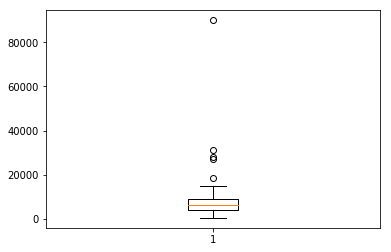

In [81]:
import matplotlib.pyplot as plt

plt.boxplot(df_vil_com["densidad"])

{'whiskers': [<matplotlib.lines.Line2D at 0x12feabc0e10>,
 'caps': [<matplotlib.lines.Line2D at 0x12feabc84e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12feabc0a20>],
 'medians': [<matplotlib.lines.Line2D at 0x12feabc8b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x12feabc8eb8>],
 'means': []}

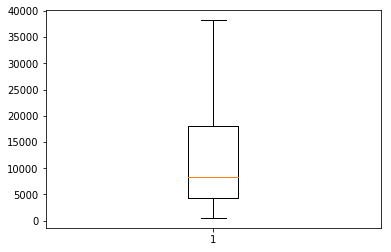

In [99]:
plt.boxplot(df_vil_com["poblacion"])

{'whiskers': [<matplotlib.lines.Line2D at 0x12feac1d4a8>,
 'caps': [<matplotlib.lines.Line2D at 0x12feac1db38>,
 'boxes': [<matplotlib.lines.Line2D at 0x12feac1d0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x12feac1df60>],
 'fliers': [<matplotlib.lines.Line2D at 0x12feac26550>],
 'means': []}

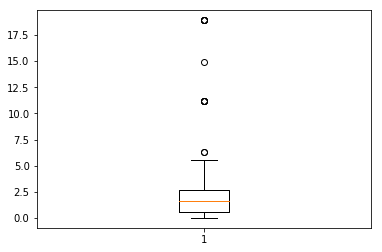

In [100]:
plt.boxplot(df_vil_com["area (km2)"])

### Comments
<p> After notice the behavior of features , i decided getting rid of "densidad" because i think this feature has many outliers that can create stranger results in the model.

</p>


### Clusters

In [82]:
from sklearn.cluster import KMeans

In [83]:
df_cluster=df_vil_com[["posx","posy","pizzerias cerca","poblacion","area (km2)"]]
df_cluster.head()

,posx,posy,pizzerias cerca,poblacion,area (km2)
0,12175308.04,10004637.71,0,2884.0,0.302000
1,12155454.80,10035358.82,0,7423.0,0.748000
2,12170281.50,10020791.53,1,1689.0,0.061959
3,12170306.92,10017277.50,1,28754.0,3.828000
4,12168674.60,10025478.63,2,12166.0,1.626000


In [84]:
from sklearn.preprocessing import StandardScaler
X = df_cluster.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.75172739, -0.40117971, -0.87217415, -0.63266605],
       [ 1.85266425, -0.40117971, -0.42525032, -0.53771525],
       [ 0.14353922,  0.58065485, -0.98983751, -0.68376938],
       [-0.26874863,  0.58065485,  1.67506525,  0.11799879],
       [ 0.69345893,  1.56248941,  0.04175998, -0.35079417],
       [ 1.31146892, -0.40117971, -0.11765171,  1.68745463],
       [-0.50334475, -0.40117971,  2.60751044,  3.32673975],
       [-0.12585703, -0.40117971, -0.28178964, -0.24094078],
       [-5.29550126, -0.40117971, -0.28178964, -0.24094078],
       [ 0.89334057, -0.40117971, -0.70833162, -0.46873754],
       [ 0.89334057, -0.40117971, -0.35425845, -0.41317216],
       [-0.80123602, -0.40117971,  1.26536045,  0.04731793],
       [-0.50817155,  0.58065485, -0.70872547, -0.14194499],
       [-0.07093428, -0.40117971, -0.56221244, -0.44127419],
       [-2.20229174, -0.40117971, -0.53267352,  2.47516306],
       [-0.71443574, -0.40117971, -1.02124723, -0.66609044],
       [-0.68931502,  0.

In [91]:
number_of_cluster=6
kmeans=KMeans(n_clusters=number_of_cluster,random_state=0).fit(Clus_dataSet)
print(kmeans.labels_)

[5 0 0 2 2 2 3 5 1 0 0 2 5 5 1 5 5 5 5 0 0 2 0 5 2 2 5 5 2 2 0 3 5 2 2 0 3
 0 5 0 0 0 2 0 2 2 5 0 2 0 5 1 5 0 2 2 3 4 4 2 5 5 5 2 5 5 0 5 0 5 0 0 5 2
 2 0 5 5 1 5 2 1 0 3 0 2 2 2 0 5 0 5 5]


In [92]:
df_vil_com["cluster"]=kmeans.labels_
df_vil_com.head()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Asentamiento,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca,cluster
0,18 Marzo,86140,17.972147,-92.980013,2884.0,0.302000,9549.67,12175308.04,10004637.71,0,5
1,Álvaro Obregón,86050,18.028827,-92.887635,7423.0,0.748000,9923.80,12155454.80,10035358.82,0,0
2,Arboledas,86079,17.986451,-92.931571,1689.0,0.061959,27259.96,12170281.50,10020791.53,1,0
3,Atasta,86100,17.986412,-92.942106,28754.0,3.828000,7511.49,12170306.92,10017277.50,1,2
4,Benito Juárez,86126,17.991007,-92.917499,12166.0,1.626000,7482.16,12168674.60,10025478.63,2,2


In [93]:
map_result=folium.Map(location=[latitude_villahermosa,longitude_villahermosa],zoom_start=12)
color=['blue','red','black','yellow','pink','green','orange']

for colonia,latitude,longitude,cluster in zip (df_vil_com["Asentamiento"],df_vil_com["Latitude"],df_vil_com["Longitude"],df_vil_com["cluster"]):
    

    label = '{}'.format(colonia)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color=color[cluster],
        fill=True,
        fill_color=color[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_result)  
    
map_result

In [94]:
color=['blue','red','black','yellow','pink','green','orange']
color_a=[]
for clusters in df_vil_com["cluster"]:
    color_a.append(color[clusters])



In [95]:
df_vil_com["color"]=color_a

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_vil_com.groupby("color").mean()

,Código Postal,Latitude,Longitude,poblacion,area (km2),densidad,posx,posy,pizzerias cerca,cluster
color,,,,,,,,,,
black,86067.880000,17.995670,-92.922932,20920.040000,3.195960,7732.158800,1.216706e+07,1.002366e+07,0.480000,2.0
blue,86088.615385,17.993217,-92.917396,4507.038462,1.209984,11591.521538,1.216791e+07,1.002551e+07,0.115385,0.0
green,86086.933333,17.989262,-92.952797,6528.933333,1.200307,7278.471333,1.216932e+07,1.001371e+07,0.366667,5.0
pink,86110.000000,17.980348,-92.941741,8985.000000,5.974000,5432.750000,1.217242e+07,1.001741e+07,6.000000,4.0
red,86136.800000,17.983879,-92.982892,9370.600000,10.128400,1479.146000,1.217120e+07,1.000366e+07,0.000000,1.0
yellow,86127.000000,17.996365,-92.933389,38224.000000,18.900000,2022.430000,1.216683e+07,1.002017e+07,0.000000,3.0


## Results and discution<a name="results"></a>

<p>In the table of the cluster we can notice that the red and yellow cluster are the best to open a pizza restaurant. There are many reasons to that.First We can see this places haven't near restaurants of pizza.Also we notice this suburbs have a great amount of people. So we can say the best suburbs to open a pizza restaurant are near to south of the city.


There are a little information about many places and restaurants in Villahermosa so, its posible that exist other pizza restaurant that fourquare  haven't registered. Otherwise, the population of suburbs is according to postal code, so its posible that exist inaccuracies in this feature.
</p>
